# AI_Project Heart Disease Predicition

by Arjun Suresh (AJ)

AI in healthcare has always been an interesting topic for me. I personally hope to see AI evolve and grow in this field so that it can help result in quicker diagnoses and save many more lives. This project aims to build predictive models for heart disease, in hopes that hopefully in the future, predictive models are able to better help doctors in their diagnoses of conditions.

# **Note:**

This version of the project has security demos attached to the code in specific code cells that are **optional** to execute. They demonstrate some examples of how security code can be utilized in AI.

In [ ]:
# Step 1: Import necessary libraries
from google.colab import files

# Step 2: Upload the file
uploaded = files.upload()

Saving heart_disease_health_indicators_BRFSS2015.csv to heart_disease_health_indicators_BRFSS2015.csv


In [ ]:
!ls

heart_disease_health_indicators_BRFSS2015.csv  sample_data


In [ ]:
import pandas as pd

# Step 3: Read the uploaded file into a DataFrame
# Assuming the uploaded file is a CSV file
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Display the first few rows of the DataFrame
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# Security - Implementation #1
Encrypting the dataset before sharing it.
You can and probably should encrypt any data, such as the CSV before it's uploaded to Colab or any cloud based environment.

1. **Data Protection in Transit:**

* When you upload a file to Colab, it is transmitted over the internet. If the file is not encrypted before uploading, it could be intercepted by malicious actors during this transmission.

2. **Colab as a Shared Environment (or any cloud based environment):**

* While Google Colab is generally secure, it is still a shared, cloud-based environment. Encrypting sensitive data before uploading ensures no one else can access the raw dataset.

3. **Compliance with privacy laws**

* Regional privacy laws may require sensititve data to be be encrypted during storage, transmission, and processing.

# Features of the code:

1. **Secure Encryption:**

* The Fernet encryption ensures that the data is securely encrypted using AES-128 in CBC mode.

2. **Reusability:**

* Both encryption and decryption are implemented as reusable functions.

3. **Verification:**

* Logging snippets of the decrypted data and displaying the DataFrame confirm the correctness of decryption.

In [ ]:
from cryptography.fernet import Fernet

# Generate a key
# Creates a random encryption key, this key is required for both encryption and decryption.
key = Fernet.generate_key()
# Creates a cipher object that will be used to encrypt and decrypt the file.
cipher = Fernet(key)

# Save the key securely
# This key is saved to a file in binary format, it allows for resuse of the key for decryption later
with open('encryption_key.key', 'wb') as f:
    f.write(key)

# Encrypt the dataset
# The CSV File is opened in binary mode, then encrypted before saved with a '.enc' extension
def encrypt_dataset(file_path, cipher):
    with open(file_path, 'rb') as file:
        encrypted_data = cipher.encrypt(file.read())
    encrypted_file_path = file_path + '.enc'
    with open(encrypted_file_path, 'wb') as encrypted_file:
        encrypted_file.write(encrypted_data)
    print(f"Dataset encrypted and saved to {encrypted_file_path}")

# Encrypted file saved to the saem directory as the dataset and cipher object
encrypt_dataset('heart_disease_health_indicators_BRFSS2015.csv', cipher)


Dataset encrypted and saved to heart_disease_health_indicators_BRFSS2015.csv.enc


# Security - Implementation #1

Decrypt the dataset before preprocessing

In [ ]:
import io

# Decrypt the dataset
def decrypt_dataset(encrypted_file_path, cipher):
  # Opens the encrypted file in binary mode
    with open(encrypted_file_path, 'rb') as encrypted_file:
      # Decrypts the dataset, returning the original dataset as a string
        decrypted_data = cipher.decrypt(encrypted_file.read())

    # Log or print the first 500 characters of the decrypted data
    print("Decrypted Data (Preview):")
    # Shows the first 500 characters of the decrypted CSV
    # .decode() converts the binary decrypted data into a readable string
    print(decrypted_data[:500].decode())

    # Read the decrypted data into a DataFrame
    return pd.read_csv(io.StringIO(decrypted_data.decode()))

# Example usage
# decrypted dataset loaded into 'df' object
heart_disease_df = decrypt_dataset('heart_disease_health_indicators_BRFSS2015.csv.enc', cipher)

# Display the first few rows of the decrypted dataset as confirmation
print("\nDecrypted Dataset (First 5 Rows):")
print(heart_disease_df.head())



Decrypted Data (Preview):
HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
0.0,1.0,0.0,1.0,27.0,0.

Decrypted Dataset (First 5 Rows):
   HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0       

# Data Preprocessing
Identify Missing or Invalid Values:

1. It checks how many rows have a value of 0 for each column.
In this dataset, a value of 0 for certain features (e.g., BMI, HighChol, Fruits) might be invalid, as these features cannot logically have a value of 0.
Replace Invalid Values:

2. For selected features (HighChol, BMI, PhysActivity, Fruits, Veggies, MentHlth, PhysHlth), 0 values are replaced with the column's mean.
This helps maintain data consistency while preventing loss of information from removing rows with invalid values.
Standardization:

3. All numeric features (except the target variable HeartDiseaseorAttack) are scaled to have a mean of 0 and a standard deviation of 1.
Standardization ensures that features with different ranges (e.g., Age and BMI) contribute equally to the model training process.
Return Preprocessed Data:

4. The function returns the updated DataFrame with preprocessed features and the original target column HeartDiseaseorAttack.


Binary Indicator

1. While binary features are included in the standardization process (StandardScaler), the scaling operation simply centers the data to have a mean of 0 and a standard deviation of 1.

2. This transformation does not distort the binary value, it simply rescales them to ensure all features contribute proportionally to the neural network training, regardless of their original range.

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Step 4: Data Preprocess
# Preprocessing function for heart disease dataset
def preprocess_heart_disease(df):
    print("Before preprocessing")
    print("Number of rows with 0 values for each variable")
    for col in df.columns:
        missing_rows = df.loc[df[col] == 0].shape[0]
        print(f"{col}: {missing_rows}")

    # Replace 0 values with the mean for selected features where 0 is invalid
    features_to_replace = ['HighChol', 'BMI', 'PhysActivity', 'Fruits', 'Veggies', 'MentHlth', 'PhysHlth']
    for feature in features_to_replace:
        df[feature] = df[feature].replace(0, np.nan)
        df[feature] = df[feature].fillna(df[feature].mean())

    print("\nAfter preprocessing")
    print("Number of rows with 0 values for each variable")
    for col in df.columns:
        missing_rows = df.loc[df[col] == 0].shape[0]
        print(f"{col}: {missing_rows}")

    # Standardize the data - So that values above 1 affect the neural net similarly.
    # Features are standardized uniformly to avoid bias due to scale differences.
    scaler = StandardScaler()
    feature_columns = [col for col in df.columns if col != 'HeartDiseaseorAttack']
    df_scaled = scaler.fit_transform(df[feature_columns])
    df_scaled = pd.DataFrame(df_scaled, columns=feature_columns)
    df_scaled['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack']

    return df_scaled

# Apply preprocessing
preprocessed_heart_disease_df = preprocess_heart_disease(df)

# Display the preprocessed data
preprocessed_heart_disease_df.head()


Before preprocessing
Number of rows with 0 values for each variable
HeartDiseaseorAttack: 229787
HighBP: 144851
HighChol: 146089
CholCheck: 9470
BMI: 0
Smoker: 141257
Stroke: 243388
Diabetes: 213703
PhysActivity: 61760
Fruits: 92782
Veggies: 47839
HvyAlcoholConsump: 239424
AnyHealthcare: 12417
NoDocbcCost: 232326
GenHlth: 0
MentHlth: 175680
PhysHlth: 160052
DiffWalk: 211005
Sex: 141974
Age: 0
Education: 0
Income: 0

After preprocessing
Number of rows with 0 values for each variable
HeartDiseaseorAttack: 229787
HighBP: 144851
HighChol: 0
CholCheck: 9470
BMI: 0
Smoker: 141257
Stroke: 243388
Diabetes: 213703
PhysActivity: 0
Fruits: 0
Veggies: 0
HvyAlcoholConsump: 239424
AnyHealthcare: 12417
NoDocbcCost: 232326
GenHlth: 0
MentHlth: 0
PhysHlth: 0
DiffWalk: 211005
Sex: 141974
Age: 0
Education: 0
Income: 0


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,HeartDiseaseorAttack
0,1.153688,0.0,0.196922,1.757936,1.120927,-0.205637,-0.425292,0.0,0.0,0.0,...,-0.303173,2.329121,1.348732e+00,5.212991e-01,2.223615,-0.887021,0.316900,-1.065595,-1.474487,0.0
1,-0.866785,0.0,-5.078164,-0.511806,1.120927,-0.205637,-0.425292,0.0,0.0,0.0,...,3.298445,0.457294,3.135025e-16,-2.640989e-16,-0.449718,-0.887021,-0.337933,0.963272,-2.440138,0.0
2,1.153688,0.0,0.196922,-0.057858,-0.892119,-0.205637,-0.425292,0.0,0.0,0.0,...,3.298445,2.329121,3.466567e+00,2.751416e+00,2.223615,-0.887021,0.316900,-1.065595,0.939638,0.0
3,1.153688,0.0,0.196922,-0.209174,-0.892119,-0.205637,-0.425292,0.0,0.0,0.0,...,-0.303173,-0.478619,3.135025e-16,-2.640989e-16,-0.449718,-0.887021,0.971733,-2.080028,-0.026012,0.0
4,1.153688,0.0,0.196922,-0.663122,-0.892119,-0.205637,-0.425292,0.0,0.0,0.0,...,-0.303173,-0.478619,-1.298561e+00,-2.640989e-16,-0.449718,-0.887021,0.971733,-0.051162,-0.991662,0.0


In [ ]:
# Mean values should be machine epsilon.
epsilon = np.finfo(float).eps
print(epsilon)

2.220446049250313e-16


In [ ]:
from tensorflow import keras
class DiagnosticCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch + 1}: loss = {logs['loss']:.4f}, accuracy = {logs['accuracy']:.4f}")

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 5: Split the data into training and testing sets
X = preprocessed_heart_disease_df.drop('HeartDiseaseorAttack', axis=1)
y = preprocessed_heart_disease_df['HeartDiseaseorAttack']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 6: Build the neural network model
model = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Security - Implementation #2
Differential Privacy integrated

After splitting the data into training and testing data and then defining your model (the neural network), you can implement differential privacy before compiling the model.

**Purpose:**

* Gradient clipping: Limits the magnitude of gradients to ensure individual contributions are

* Noise addition: Obscures individual contributions by adding noise (differential privacy)

Gaussian Noise:

* a type of signal noise that follows a normal distribution, or a bell curve shape

* For the code specifically: Add Gaussian noise with standard deviation noise_std to the clipped gradients, ensuring differential privacy.


In [ ]:
import tensorflow as tf

# Custom training loop with gradient clipping and noise
@tf.function
def train_step(model, optimizer, x, y, noise_std=0.1, clip_norm=1.0):
    # Reshape y to match the shape of predictions
    y = tf.reshape(y, (-1, 1))

    with tf.GradientTape() as tape:
        predictions = model(x, training=True)
        loss = tf.keras.losses.binary_crossentropy(y, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)

    # Clip gradients to limit sensitivity
    # Reduce how much gradients affect the model
    clipped_gradients = [tf.clip_by_norm(g, clip_norm) for g in gradients]

    # Add Gaussian noise to gradients
    # Achieve differential privacy
    noisy_gradients = [g + tf.random.normal(g.shape, stddev=noise_std) for g in clipped_gradients]

    # Apply gradients (Specifically noisy gradients to the model's weights)
    optimizer.apply_gradients(zip(noisy_gradients, model.trainable_variables))
    return loss

# Training loop
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
epochs = 20
batch_size = 256
steps_per_epoch = len(X_train) // batch_size

for epoch in range(epochs):
    for step in range(steps_per_epoch):
        x_batch = X_train[step * batch_size:(step + 1) * batch_size]
        y_batch = y_train[step * batch_size:(step + 1) * batch_size]
        loss = train_step(model, optimizer, x_batch, y_batch)
    print(f"Epoch {epoch + 1}/{epochs}: Loss = {loss.numpy().mean()}")


Epoch 1/20: Loss = 0.26037895679473877
Epoch 2/20: Loss = 0.2573646306991577
Epoch 3/20: Loss = 0.259685218334198
Epoch 4/20: Loss = 0.2600940763950348
Epoch 5/20: Loss = 0.25881898403167725
Epoch 6/20: Loss = 0.2599841356277466
Epoch 7/20: Loss = 0.2596432566642761
Epoch 8/20: Loss = 0.25941669940948486
Epoch 9/20: Loss = 0.2597348690032959
Epoch 10/20: Loss = 0.2604091167449951
Epoch 11/20: Loss = 0.2602918744087219
Epoch 12/20: Loss = 0.25799667835235596
Epoch 13/20: Loss = 0.2579203248023987
Epoch 14/20: Loss = 0.2590181231498718
Epoch 15/20: Loss = 0.25868362188339233
Epoch 16/20: Loss = 0.25873279571533203
Epoch 17/20: Loss = 0.26096004247665405
Epoch 18/20: Loss = 0.2588229477405548
Epoch 19/20: Loss = 0.2601110339164734
Epoch 20/20: Loss = 0.2595787048339844


# Compiling the Model

Because we want to use model.evaluate and get metrics for our data, even after running a custom training loop for differential privacy, we want to run model.compile with model.fit for training.

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 7: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, verbose=2, validation_data=(X_test, y_test))

# Evaluate the model
train_accuracy = model.evaluate(X_train, y_train, verbose=0)[1]
test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]

train_accuracy, test_accuracy


Epoch 1/20
6342/6342 - 11s - 2ms/step - accuracy: 0.9081 - loss: 0.2392 - val_accuracy: 0.9069 - val_loss: 0.2432
Epoch 2/20
6342/6342 - 12s - 2ms/step - accuracy: 0.9081 - loss: 0.2388 - val_accuracy: 0.9073 - val_loss: 0.2421
Epoch 3/20
6342/6342 - 15s - 2ms/step - accuracy: 0.9083 - loss: 0.2385 - val_accuracy: 0.9073 - val_loss: 0.2426
Epoch 4/20
6342/6342 - 18s - 3ms/step - accuracy: 0.9085 - loss: 0.2383 - val_accuracy: 0.9071 - val_loss: 0.2425
Epoch 5/20
6342/6342 - 20s - 3ms/step - accuracy: 0.9084 - loss: 0.2380 - val_accuracy: 0.9070 - val_loss: 0.2423
Epoch 6/20
6342/6342 - 13s - 2ms/step - accuracy: 0.9087 - loss: 0.2378 - val_accuracy: 0.9072 - val_loss: 0.2428
Epoch 7/20
6342/6342 - 15s - 2ms/step - accuracy: 0.9085 - loss: 0.2377 - val_accuracy: 0.9070 - val_loss: 0.2425
Epoch 8/20
6342/6342 - 13s - 2ms/step - accuracy: 0.9088 - loss: 0.2376 - val_accuracy: 0.9065 - val_loss: 0.2430
Epoch 9/20
6342/6342 - 21s - 3ms/step - accuracy: 0.9084 - loss: 0.2376 - val_accuracy: 

(0.9090487957000732, 0.9069103002548218)

In [ ]:
# Results - Accuracy
scores = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

Training Accuracy: 90.90%

Testing Accuracy: 90.69%



1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


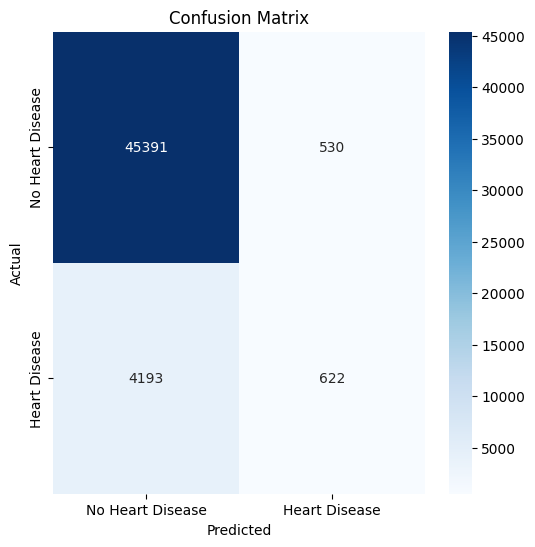

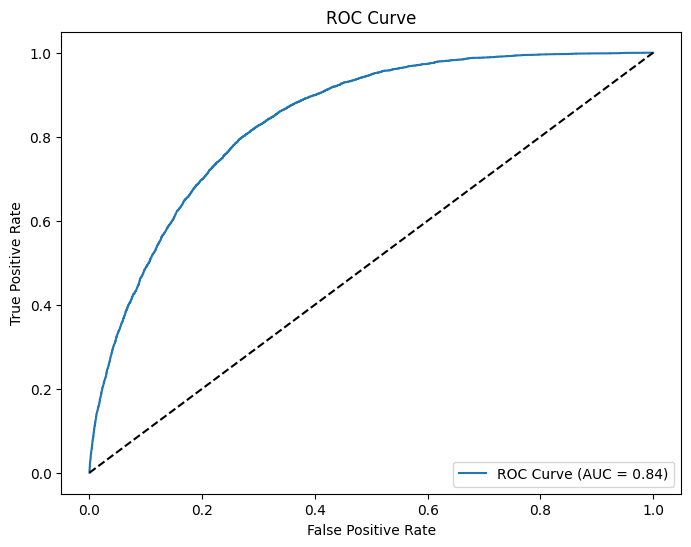

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns

# Generate predictions and probabilities (Replace with model's predictions)
y_test_pred_probs = model.predict(X_test[:len(y_test)]).flatten()  # Predicted probabilities
y_test_pred_binary = (y_test_pred_probs >= 0.5).astype(int)  # Binary predictions

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_binary)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Heart Disease", "Heart Disease"],
            yticklabels=["No Heart Disease", "Heart Disease"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_pred_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guess
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


# Analysis:

* The model is better at predicting "No Heart Disease" but struggles with predicting "Heart Disease," as evidenced by the high number of false negatives.

* Imbalanced data may be influencing the performance, as the model might be biased toward the majority class.

# Potential Improvements:

* Handle Class Imbalance:
  * Use techniques like oversampling the minority class or undersampling the majority class.

  * Adjust the class weights during model training to penalize misclassifications of the minority class more heavily.

# ROC Curve:

* Optimize Threshold:

  * The default threshold of 0.5 may not be optimal for this task. Adjust the threshold to balance sensitivity (true positive rate) and specificity (true negative rate) based on the problem's priorities.

  * Example: If reducing false negatives (missing heart disease cases) is critical, lower the threshold to increase sensitivity.

# Overall:

* The model demonstrates reasonable performance with an AUC of 0.84, indicating it can distinguish between heart disease and no heart disease cases better than random guessing. However, the high false-negative rate (4,469) highlights the need to improve the model's sensitivity, especially for identifying cases of heart disease.
